In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
path = "/content/drive/MyDrive/IBM - Data Science/Analysis project(IBM-Nation)/Project-1-Analysis/Files/Product Data Set - Student 2 of 3.csv"
product_data = pd.read_csv(path, sep = '|')
product_data.head(2)

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35


In [4]:
path = "/content/drive/MyDrive/IBM - Data Science/Analysis project(IBM-Nation)/Project-1-Analysis/Files/Transaction Data Set - Student 3 of 3.csv"
transactions_data = pd.read_csv(path, sep = '|')
transactions_data.head(2)

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0


In [5]:
path = "/content/drive/MyDrive/IBM - Data Science/Analysis project(IBM-Nation)/Project-1-Analysis/Files/Customer Data Set - Student 1 of 3.csv"
customer_data = pd.read_csv(path, sep = ',')
customer_data.head(2)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married


In [6]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: x.replace('$','')) 
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: int(x.replace(',',''))) 

In [7]:
product_data['UNIT LIST PRICE'] = product_data['UNIT LIST PRICE'].map(lambda x: float(x.replace('$',''))) 

In [8]:
trans_products = transactions_data.merge(product_data, how= 'inner', left_on ='PRODUCT NUM', right_on = 'PRODUCT CODE')
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46


In [9]:
trans_products['Total_Price'] = trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1-trans_products['DISCOUNT TAKEN'])
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,Total_Price
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


In [10]:
customer_prod_categ = trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price': 'sum'})
customer_prod_categ.head()

Total_Price
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

In [11]:
customer_prod_categ.reset_index()

,CUSTOMER NUM,PRODUCT CATEGORY,Total_Price
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509
...,...,...,...
1422,10498,HEALTH & BEAUTY,320.145
1423,10499,HEALTH & BEAUTY,20.010
1424,10500,APPAREL,1511.748
1425,10500,ELECTRONICS,2632.269


In [12]:
customer_pivot = customer_prod_categ.pivot_table(index='CUSTOMER NUM', columns='PRODUCT CATEGORY', values='Total_Price')
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


In [13]:
trans_total_spend = trans_products.groupby('CUSTOMER NUM').agg({'Total_Price': 'sum'}).\
rename(columns = {'Total_Price':'Total Spent'})
trans_total_spend.head()

,Total Spent
CUSTOMER NUM,
10001,6826.770
10002,5062.451
10003,8562.440
10004,5522.694
10005,213.512


In [14]:
customer_KPIS = customer_pivot.merge(trans_total_spend, how = 'inner', left_index= True , right_index = True)
customer_KPIS.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,Total Spent
CUSTOMER NUM,,,,,
10001,4022.430,1601.315,68.688,1134.337,6826.770
10002,2312.509,2473.163,276.779,NaN,5062.451
10003,2887.382,5414.418,260.640,NaN,8562.440
10004,3637.213,1840.211,45.270,NaN,5522.694
10005,213.512,NaN,NaN,NaN,213.512


In [15]:
customer_all_view = customer_data.merge(customer_KPIS, how ='inner', left_on='CUSTOMERID', right_index=True)
customer_all_view=customer_all_view.fillna(0)
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,Total Spent
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,0,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,0,1,Single,213.512,0.000,0.000,0.000,213.512


# **Clustering**

In [16]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [17]:
cluster_input = customer_all_view[['INCOME','Total Spent']]
cluster_input.head(5)

,INCOME,Total Spent
0,133498,6826.770
1,94475,5062.451
2,88610,8562.440
3,84313,5522.694
4,51498,213.512


Although you can use the elbow method or silhouette to determine the optimal number of clusters, but we divide it into 4 clusters


In [18]:
Kmeans_model= KMeans(n_clusters=4)

In [19]:
cluster_output = Kmeans_model.fit_predict(cluster_input)
cluster_output

array([1, 3, 0, 0, 2, 1, 0, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 1, 0, 3, 3,
       3, 2, 3, 3, 0, 2, 2, 1, 0, 2, 2, 3, 2, 2, 0, 3, 3, 2, 2, 0, 0, 0,
       1, 2, 2, 0, 1, 2, 3, 2, 0, 2, 3, 2, 3, 3, 3, 2, 0, 3, 1, 3, 1, 0,
       0, 3, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 3, 1, 3, 0, 3, 1, 2,
       0, 2, 3, 1, 3, 3, 3, 0, 3, 2, 1, 3, 2, 2, 2, 2, 0, 3, 3, 2, 0, 2,
       2, 2, 0, 2, 3, 2, 1, 1, 0, 0, 2, 3, 3, 2, 0, 0, 3, 0, 2, 1, 0, 0,
       2, 0, 1, 3, 1, 1, 3, 0, 0, 2, 2, 2, 0, 3, 3, 2, 3, 0, 0, 3, 3, 3,
       0, 3, 2, 2, 3, 2, 1, 2, 1, 3, 2, 0, 2, 1, 0, 2, 1, 2, 3, 3, 1, 2,
       1, 1, 3, 2, 1, 2, 0, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 1, 3, 1, 3, 1,
       3, 0, 3, 2, 1, 1, 3, 2, 0, 1, 1, 1, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2,
       0, 2, 3, 2, 2, 0, 3, 2, 2, 0, 3, 0, 3, 0, 0, 2, 3, 1, 2, 2, 2, 0,
       0, 0, 0, 2, 3, 3, 1, 2, 0, 3, 2, 3, 2, 0, 2, 1, 3, 3, 2, 1, 2, 0,
       0, 1, 3, 0, 0, 3, 1, 0, 1, 2, 2, 2, 1, 0, 3, 3, 3, 0, 0, 0, 1, 0,
       3, 0, 3, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2,

In [20]:
product_data.head().values

array([[30001, 'HEALTH & BEAUTY', 7.45],
       [30002, 'HEALTH & BEAUTY', 5.35],
       [30003, 'HEALTH & BEAUTY', 5.49],
       [30004, 'HEALTH & BEAUTY', 6.46],
       [30005, 'HEALTH & BEAUTY', 7.33]], dtype=object)

In [21]:
product_data.head().values[1,2]

5.35

convert the 1-dimensional NumPy array to a Pandas data frame 

In [22]:
cluster_output_pd = pd.DataFrame(cluster_output, columns= ['segment']) 
cluster_output_pd.head()

,segment
0,1
1,3
2,0
3,0
4,2


Merge the cluster input containing the income and total spending for each customer and the cluster output

In [23]:
segment_DF = pd.concat([cluster_input, cluster_output_pd], axis=1)
segment_DF.head()

,INCOME,Total Spent,segment
0,133498,6826.770,1
1,94475,5062.451,3
2,88610,8562.440,0
3,84313,5522.694,0
4,51498,213.512,2


**The cluster centroids**

In [24]:
Kmeans_model.cluster_centers_

array([[ 76337.14084507,   5260.48642958],
       [138471.625     ,   6972.91513636],
       [ 38530.82608696,   2260.43836232],
       [110254.62121212,   7744.12999242]])

 To select only those segments that belong to the first cluster (cluster index=0)

In [25]:
segment_DF[segment_DF.segment ==0].head()

,INCOME,Total Spent,segment
2,88610,8562.440,0
3,84313,5522.694,0
6,65002,5224.616,0
9,76994,6620.147,0
12,88829,4685.902,0


In [26]:
segment_DF[segment_DF.segment ==1].head()

,INCOME,Total Spent,segment
0,133498,6826.770,1
5,132893,5234.847,1
18,137128,8021.160,1
29,144108,6866.584,1
44,143119,7469.745,1


In [27]:
segment_DF[segment_DF.segment ==2].head()

,INCOME,Total Spent,segment
4,51498,213.512,2
10,20256,1496.871,2
23,51529,2884.220,2
27,22972,35.110,2
28,32168,3007.526,2


In [28]:
segment_DF[segment_DF.segment ==3].head()

,INCOME,Total Spent,segment
1,94475,5062.451,3
7,115672,8412.001,3
8,101741,9116.576,3
11,101805,293.100,3
17,112035,4242.889,3


In [29]:
import matplotlib.pyplot as plt 

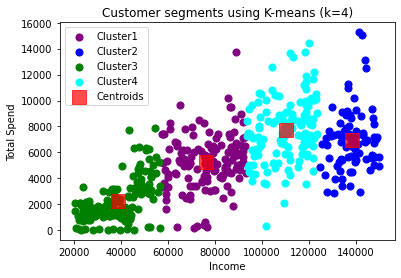

In [30]:
plt.scatter(segment_DF[segment_DF.segment==0]['INCOME'],segment_DF[segment_DF.segment==0]['Total Spent'],s=50, c='purple',label='Cluster1')
plt.scatter(segment_DF[segment_DF.segment==1]['INCOME'],segment_DF[segment_DF.segment==1]['Total Spent'],s=50, c='blue',label='Cluster2')
plt.scatter(segment_DF[segment_DF.segment==2]['INCOME'],segment_DF[segment_DF.segment==2]['Total Spent'],s=50, c='green',label='Cluster3')
plt.scatter(segment_DF[segment_DF.segment==3]['INCOME'],segment_DF[segment_DF.segment==3]['Total Spent'],s=50, c='cyan',label='Cluster4')
plt.scatter(Kmeans_model.cluster_centers_[:,0], Kmeans_model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')

plt.title('Customer segments using K-means (k=4)')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.legend()
plt.show()

In [40]:
customer_demographics=pd.concat([customer_all_view,cluster_output_pd],axis=1)
customer_demographics.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,Total Spent,segment
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770,1
1,10002,0,42,94475,9,notenrolled,0,6,Married,2312.509,2473.163,276.779,0.000,5062.451,3
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440,0
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694,0
4,10005,0,30,51498,3,notenrolled,0,1,Single,213.512,0.000,0.000,0.000,213.512,2


In [41]:
customer_demographics.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median'})

,AGE,HOUSEHOLD SIZE
segment,,
0,35.661972,3.0
1,73.420455,2.0
2,24.449275,2.0
3,47.416667,3.0


value_counts function -> to know relative proportions -> return counts of different (categories)

In [42]:
def percent_loyalty(series):
    percent=100 * series.value_counts()['enrolled'] /series.count()
    return percent

In [44]:
customer_demographics.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median','LOYALTY GROUP': percent_loyalty})

,AGE,HOUSEHOLD SIZE,LOYALTY GROUP
segment,,,
0,35.661972,3.0,32.394366
1,73.420455,2.0,65.909091
2,24.449275,2.0,52.173913
3,47.416667,3.0,66.666667
